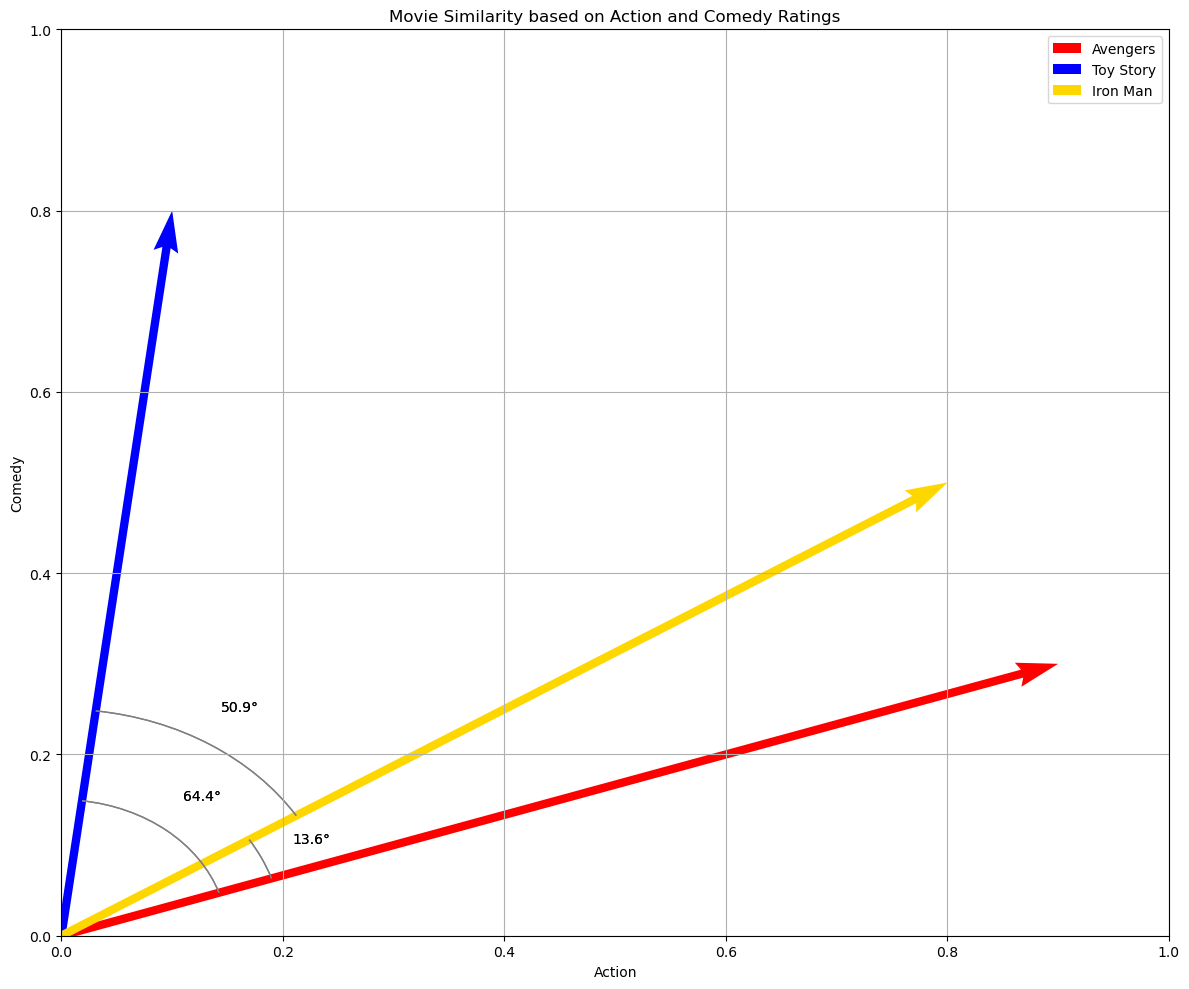

Avengers - Toy Story:
  Cosine similarity: 0.43
  Angle: 64.44°
Avengers - Iron Man:
  Cosine similarity: 0.97
  Angle: 13.57°
Toy Story - Avengers:
  Cosine similarity: 0.43
  Angle: 64.44°
Toy Story - Iron Man:
  Cosine similarity: 0.63
  Angle: 50.87°
Iron Man - Avengers:
  Cosine similarity: 0.97
  Angle: 13.57°
Iron Man - Toy Story:
  Cosine similarity: 0.63
  Angle: 50.87°


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define our movies and their feature vectors
# Format: [Action, Comedy]
movies = {
    "Avengers": [0.9, 0.3],
    "Toy Story": [0.1, 0.8],
    "Iron Man": [0.8, 0.5]
}

# Define colors for each movie
colors = {
    "Avengers": "red",
    "Toy Story": "blue",
    "Iron Man": "gold"
}

# Function to calculate cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Function to calculate angle between vectors
def angle_between(v1, v2):
    return np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1.0, 1.0))

# Calculate similarities and angles
similarities = {}
angles = {}
for movie1 in movies:
    for movie2 in movies:
        if movie1 != movie2:
            sim = cosine_similarity(movies[movie1], movies[movie2])
            ang = np.degrees(angle_between(movies[movie1], movies[movie2]))
            similarities[f"{movie1} - {movie2}"] = sim
            angles[f"{movie1} - {movie2}"] = ang

            # Plotting
plt.figure(figsize=(12, 10))

# Plot movie vectors
for movie, features in movies.items():
    plt.quiver(0, 0, features[0], features[1], angles='xy', scale_units='xy', scale=1, label=movie, color=colors[movie])

# Set plot limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Action")
plt.ylabel("Comedy")
plt.title("Movie Similarity based on Action and Comedy Ratings")
plt.legend()
plt.grid(True)

# Add similarity and angle annotations
for i, (pair, sim) in enumerate(similarities.items()):
    ang = angles[pair]
    # plt.annotate(f"{pair}:\nSimilarity: {sim:.2f}\nAngle: {ang:.2f}°", (0.1, 0.95 - i*0.1), xycoords='axes fraction')

# Add angle arcs
radii = {
    "Avengers - Toy Story": 0.15, "Toy Story - Avengers": 0.15,
    "Avengers - Iron Man": 0.2, "Iron Man - Avengers": 0.2,
    "Toy Story - Iron Man": 0.25, "Iron Man - Toy Story": 0.25
}
for pair, ang in angles.items():
    movie1, movie2 = pair.split(" - ")
    v1, v2 = movies[movie1], movies[movie2]
    radius = radii[pair]
    theta1 = np.arctan2(v1[1], v1[0])
    theta2 = np.arctan2(v2[1], v2[0])
    if theta1 > theta2:
        theta1, theta2 = theta2, theta1
    arc = Arc((0, 0), radius*2, radius*2, 
              angle=0, theta1=np.degrees(theta1), theta2=np.degrees(theta2), 
              color='gray', lw=1)
    plt.gca().add_patch(arc)
    
    # Add arc label
    angle_rad = (theta1 + theta2) / 2
    label_x = (radius + 0.05) * np.cos(angle_rad)
    label_y = (radius + 0.05) * np.sin(angle_rad)
    plt.text(label_x, label_y, f"{ang:.1f}°", ha='center', va='center')

plt.tight_layout()
plt.savefig('movie_similarity_plot.png', dpi=300, bbox_inches='tight')

plt.show()

# Print similarities and angles
for pair in similarities:
    print(f"{pair}:")
    print(f"  Cosine similarity: {similarities[pair]:.2f}")
    print(f"  Angle: {angles[pair]:.2f}°")

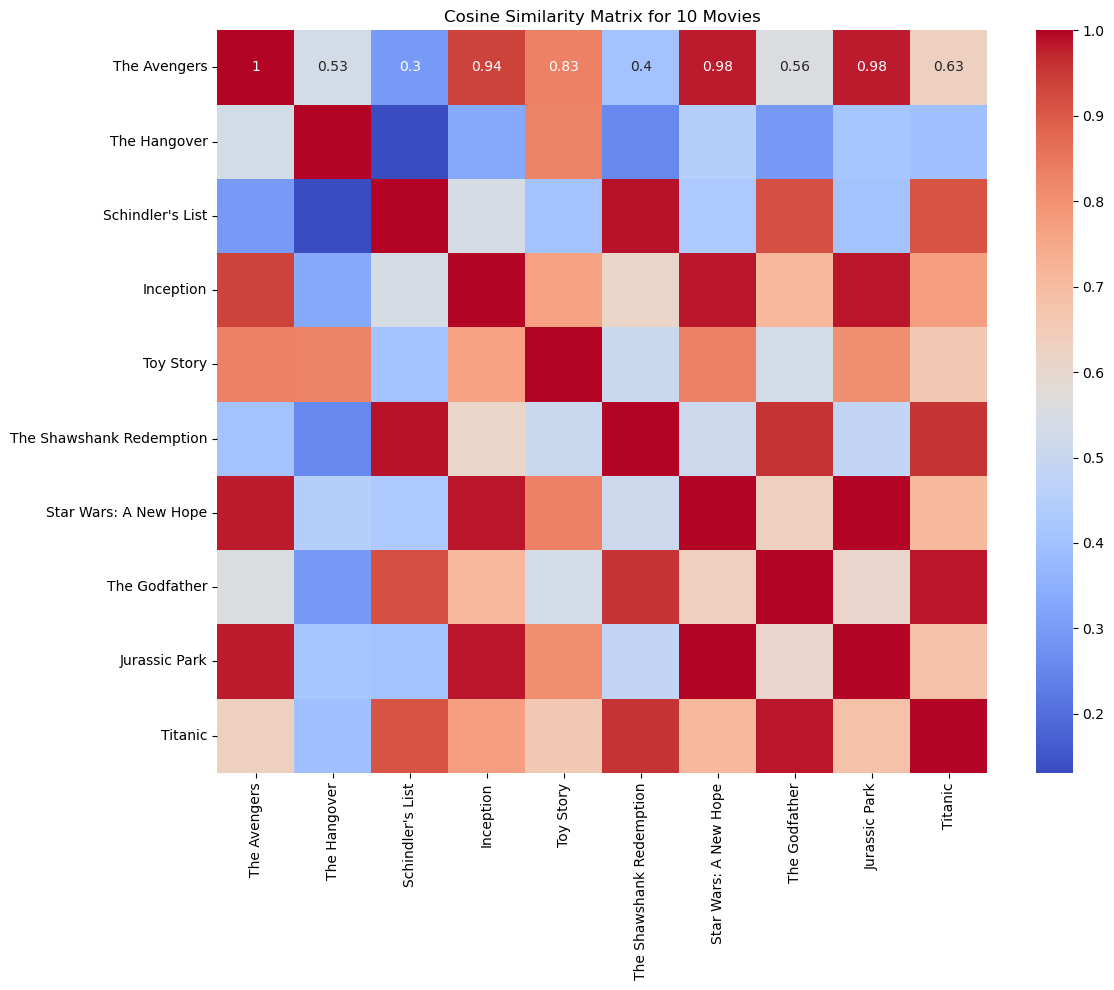

Movie Features (Action, Comedy, Drama, Sci-Fi):
The Avengers: [0.9, 0.5, 0.3, 0.8]
The Hangover: [0.2, 0.9, 0.1, 0.0]
Schindler's List: [0.1, 0.0, 0.9, 0.0]
Inception: [0.7, 0.2, 0.6, 0.8]
Toy Story: [0.3, 0.8, 0.4, 0.5]
The Shawshank Redemption: [0.2, 0.1, 0.9, 0.0]
Star Wars: A New Hope: [0.8, 0.4, 0.5, 0.9]
The Godfather: [0.5, 0.1, 0.9, 0.0]
Jurassic Park: [0.7, 0.3, 0.4, 0.8]
Titanic: [0.4, 0.2, 0.8, 0.1]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define movies with more realistic features
# Format: [Action, Comedy, Drama, Sci-Fi]
movies = {
    "The Avengers": [0.9, 0.5, 0.3, 0.8],
    "The Hangover": [0.2, 0.9, 0.1, 0.0],
    "Schindler's List": [0.1, 0.0, 0.9, 0.0],
    "Inception": [0.7, 0.2, 0.6, 0.8],
    "Toy Story": [0.3, 0.8, 0.4, 0.5],
    "The Shawshank Redemption": [0.2, 0.1, 0.9, 0.0],
    "Star Wars: A New Hope": [0.8, 0.4, 0.5, 0.9],
    "The Godfather": [0.5, 0.1, 0.9, 0.0],
    "Jurassic Park": [0.7, 0.3, 0.4, 0.8],
    "Titanic": [0.4, 0.2, 0.8, 0.1]
}

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calculate similarity matrix
n_movies = len(movies)
similarity_matrix = np.zeros((n_movies, n_movies))
movie_names = list(movies.keys())

for i in range(n_movies):
    for j in range(n_movies):
        similarity_matrix[i, j] = cosine_similarity(movies[movie_names[i]], movies[movie_names[j]])

# Visualize the similarity matrix
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=movie_names, yticklabels=movie_names)
plt.title('Cosine Similarity Matrix for 10 Movies')
plt.tight_layout()
plt.savefig('movie_similarity_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the movie features
print("Movie Features (Action, Comedy, Drama, Sci-Fi):")
for movie, features in movies.items():
    print(f"{movie}: {features}")